![Brazil Flag](http://www.brazil.org.za/brazil-images/brazil-flag.png)

### <center> **Chukwuemeka Mba-Kalu** </center> <center> **Joseph Onwughalu** </center>
### <center> **An Analysis of the Brazilian Economy between 2000 and 2012** </center>
#### <center> Final Project In Partial Fulfillment of the Course Requirements </center>  <center> [**Data Bootcamp**](http://nyu.data-bootcamp.com/) </center>
##### <center> Stern School of Business, NYU Spring 2017 </center> <center> **May 12, 2017** </center> 

### The Brazilian Economy
In this project we examine in detail different complexities of Brazil’s growth between the years 2000-2012. During this period, Brazil set an example for many of the major emerging economies in Latin America, Africa, and Asia. 

From the years 2000-2012, Brazil was one of the fastest growing major economies in the world. It is the 8th largest economy in the world, with its GDP totalling 2.2 trillion dollars and GDP per Capita being at 10,308 dollars. While designing this project, we were interested to find out more about the main drivers of the Brazilian economy. Specifically, we aim to look at specific trends and indicators that directly affect economic growth, especially in fast-growing countries such as Brazil. Certain trends include household consumption and its effects on the GDP, bilateral aid and investment flows and its effects on the GDP per capita growth. We also aim to view the effects of economic growth on climate change and public health by observing the carbon emissions percentage changes and specific indicators like the mortality rate.

We will be looking at generally accepted economic concepts and trends, making some hypotheses, and comparing our hypotheses to the Brazil data we have. Did Brazil follow these trends on its path to economic growth?


### Methodology - Data Acquisition
All the data we are using in this project was acquired from the World Bank and can be accessed and downloaded from the [website](www.WorldBank.org). By going on the website and searching for “World data report” we were given access to information that has to be submitted by the respective countries on the site. By clicking “[Brazil](http://databank.worldbank.org/data/reports.aspx?source=2&country=BRA),” we’re shown the information of several economic indicators and their respective data over a time period of 2000-2012 that we downloaded as an excel file. We picked more than 20 metrics to include in our data, such as: 
* Population
* GDP (current US Dollars)
* Household final consumption expenditure, etc. (% of GDP)
* General government final consumption expenditure (current US Dollars)
* Life expectancy at birth, total (years) 

For all of our analysis and data we will be looking at the 2000-2012 time period and have filtered the spreadsheets accordingly to reflect this information.


In [549]:
# Inportant Packages
import pandas as pd
import matplotlib.pyplot as plt
import sys
import datetime as dt

In [550]:
print('Python version is:', sys.version)
print('Pandas version:', pd.__version__)
print('Date:', dt.date.today())

Python version is: 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.18.1
Date: 2017-05-11


### Reading in and Cleaning up the Data

We downloaded our [data](http://databank.worldbank.org/data/AjaxDownload/FileDownloadHandler.ashx?filename=67fd49af-3b41-4515-b248-87b045e61886.zip&filetype=CSV&language=en&displayfile=Data_Extract_From_World_Development_Indicators.zip) in xlxs, retained and renamed the important columns, and deleted rows without enough data. We alse transposed the table to make it easier to plot diagrams.

In [551]:
path = 'C:\\Users\\emeka_000\\Desktop\\Bootcamp_Emeka.xlsx'
odata = pd.read_excel(path, 
                    usecols = ['Series Name','2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]',
                               '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
                               '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
                               '2011 [YR2011]', '2012 [YR2012]']
                    ) #retained only the necessary columns 

odata.columns = ['Metric', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
               '2009', '2010', '2011', '2012'] #easier column names

odata = odata.drop([20, 21, 22, 23, 24]) ##delete NaN values

odata = odata.transpose() #transpose to make diagram easier


odata #data with metrics description for the chart below

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Metric,Population growth (annual %),"Population, total","Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net outflows (% of ...",GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Health expenditure, total (% of GDP)","Household final consumption expenditure, etc. ...","Net bilateral aid flows from DAC donors, Unite...","Personal remittances, paid (current US$)",Net official development assistance and offici...,CO2 emissions from liquid fuel consumption (% ...,CO2 emissions from gaseous fuel consumption (%...,General government final consumption expenditu...,Renewable energy consumption (% of total final...,"Mortality rate, adult, male (per 1,000 male ad...","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)","Life expectancy at birth, female (years)"
2000,1.50939,1.75786e+08,5.03412,0.380986,6.55421e+11,4.11256,3728.51,7.02775,64.5927,-5.785e+07,3.38325e+08,2.4107e+08,71.3591,5.49518,1.23008e+11,42.7988,247.531,66.281,70.042,73.991
2001,1.48671,1.78419e+08,4.15213,-0.266208,5.59373e+11,1.38987,3135.16,7.19064,64.1079,-7.075e+07,3.44833e+08,2.3636e+08,70.7756,6.78664,1.08201e+11,41.4779,242.399,66.704,70.4596,74.403
2002,1.4612,1.81046e+08,3.26532,0.48793,5.07963e+11,3.0533,2805.72,7.13006,61.8984,-3.714e+07,3.29421e+08,2.1593e+08,69.6777,8.53217,1.00626e+11,43.0246,237.267,67.095,70.8452,74.783
2003,1.41595,1.83627e+08,1.81312,0.0409781,5.5832e+11,1.14101,3040.51,6.94296,61.8447,-5.608e+07,2.9598e+08,2.0758e+08,68.2773,9.08251,1.06513e+11,45.3087,233.267,67.457,71.2019,75.134
2004,1.34637,1.86116e+08,2.71638,1.41731,6.69316e+11,5.75988,3596.22,7.06794,60.2066,-5.746e+07,3.39493e+08,1.6184e+08,67.0419,10.6854,1.23607e+11,45.39,229.267,67.792,71.532,75.459
2005,1.26158,1.88479e+08,1.7339,0.326412,8.9163e+11,3.20214,4730.65,8.26703,60.5044,-2.593e+07,3.73953e+08,1.925e+08,66.8279,11.0218,1.68429e+11,46.3479,225.268,68.105,71.8396,75.761
2006,1.17044,1.90698e+08,1.74949,2.59997,1.10764e+12,3.9619,5808.34,8.35571,60.4376,-6.786e+07,5.29306e+08,8.994e+07,66.3981,11.5262,2.10883e+11,46.9051,221.268,68.401,72.1317,76.049
2007,1.08808,1.92785e+08,3.19089,1.2212,1.39708e+12,6.06987,7246.87,8.28059,59.8749,3.85e+06,5.62634e+08,3.0876e+08,66.137,11.1722,2.64649e+11,47.4176,217.268,68.688,72.4148,76.328
2008,1.02447,1.9477e+08,2.99066,1.53998,1.69582e+12,5.09434,8706.82,8.23799,59.7308,1.233e+07,8.13083e+08,4.5237e+08,65.2685,12.5298,3.19484e+11,47.2633,213.842,68.972,72.6954,76.605


In [552]:
data = pd.read_excel(path, 
                    usecols = ['2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]',
                               '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
                               '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
                               '2011 [YR2011]', '2012 [YR2012]']
                    ) #same data but modified for pandas edits 

data.columns = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
               '2009', '2010', '2011', '2012'] #all columns are now string

data = data.transpose() #data used for the rest of the project

### GDP Growth and GDP Growth Rate in Brazil 
To demonstrate Brazil's strong economic growht between 2000 and 2012, here are a few charts illustrating Brazil's GDP growth. 

Gross domestic product (GDP) is the monetary value of all the finished goods and services produced within a country's borders in a specific time period. Though GDP is usually calculated on an annual basis, it can be calculated on a quarterly basis as well. GDP includes all private and public consumption, government outlays, investments and exports minus imports that occur within a defined territory. Put simply, GDP is a broad measurement of a nation’s overall economic activity.

GDP per Capita is a measure of the total output of a country that takes gross domestic product (GDP) and divides it by the number of people in the country. 

Read more on [Investopedia](http://www.investopedia.com/terms/g/gdp.asp#ixzz4gjgzo4Ri)

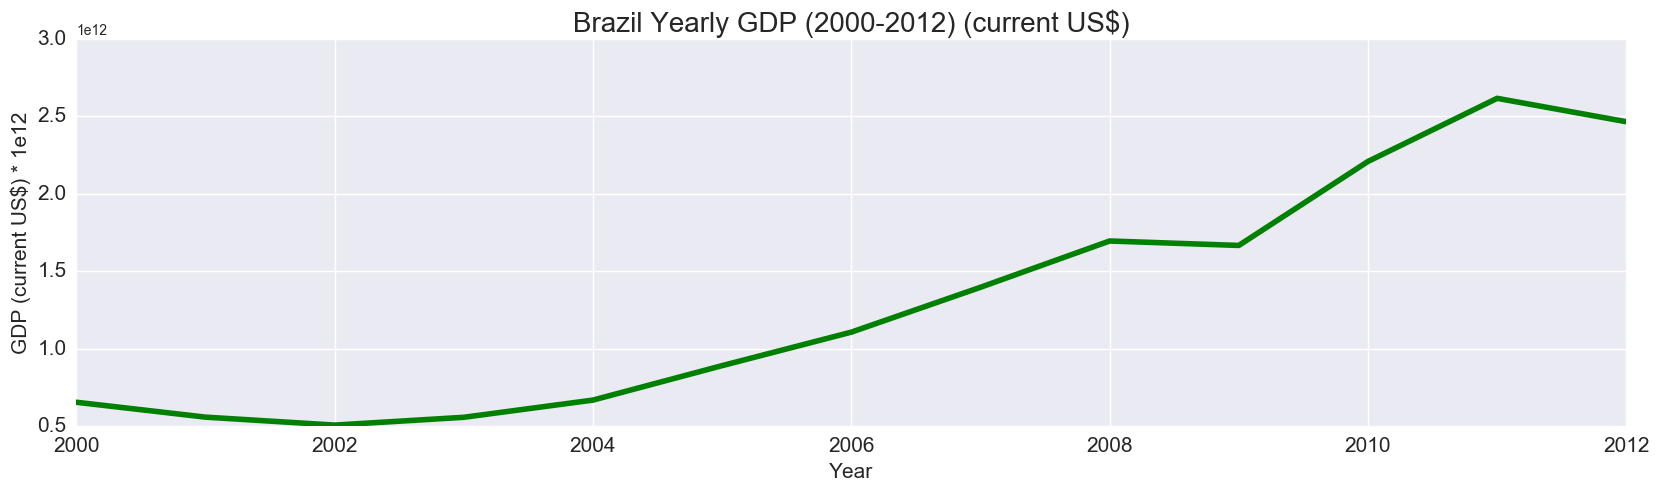

In [553]:
  
data[4].plot(kind = 'line',  #line plot
             title = 'Brazil Yearly GDP (2000-2012) (current US$)',   #title
             fontsize=15,
             color='Green', 
             linewidth=4, #width of plot line
             figsize=(20,5),).title.set_size(20) #set figure size and title size

plt.xlabel("Year").set_size(15) 
plt.ylabel("GDP (current US$) * 1e12").set_size(15) #set x and y axis, with their sizes


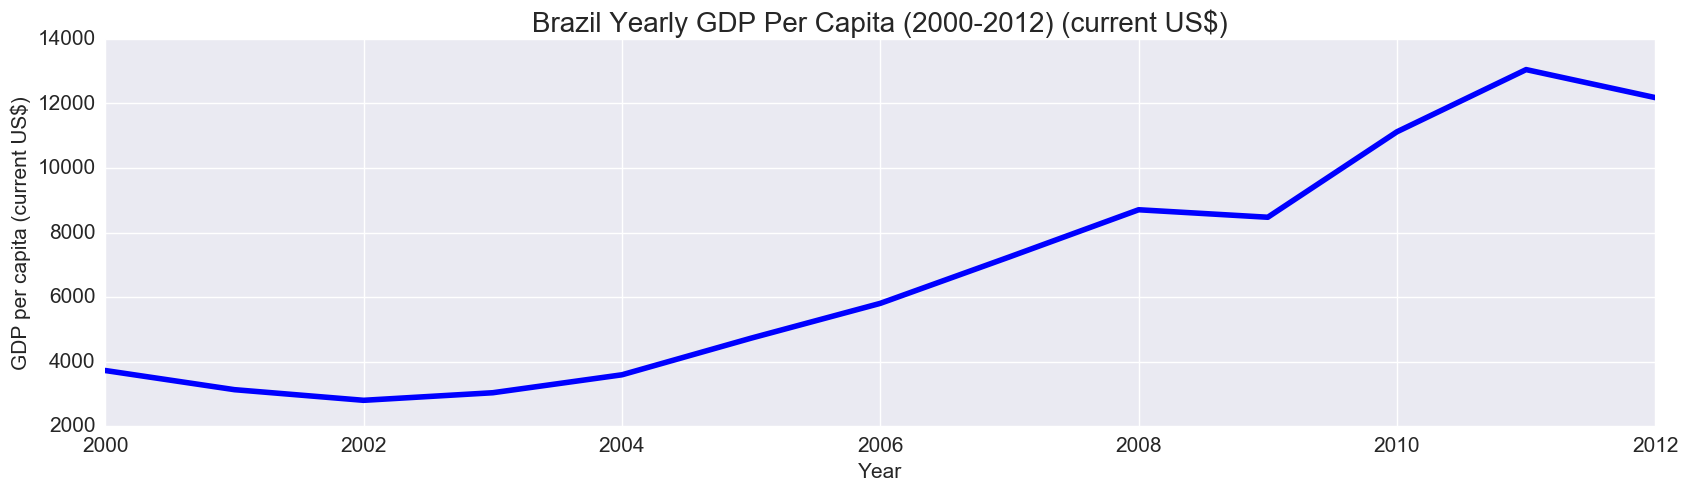

In [554]:
data[6].plot(kind = 'line',
             title = 'Brazil Yearly GDP Per Capita (2000-2012) (current US$)', 
             fontsize=15, 
             color='blue', 
             linewidth=4, 
             figsize=(20,5)).title.set_size(20)

plt.xlabel("Year").set_size(15)
plt.ylabel("GDP per capita (current US$)").set_size(15)

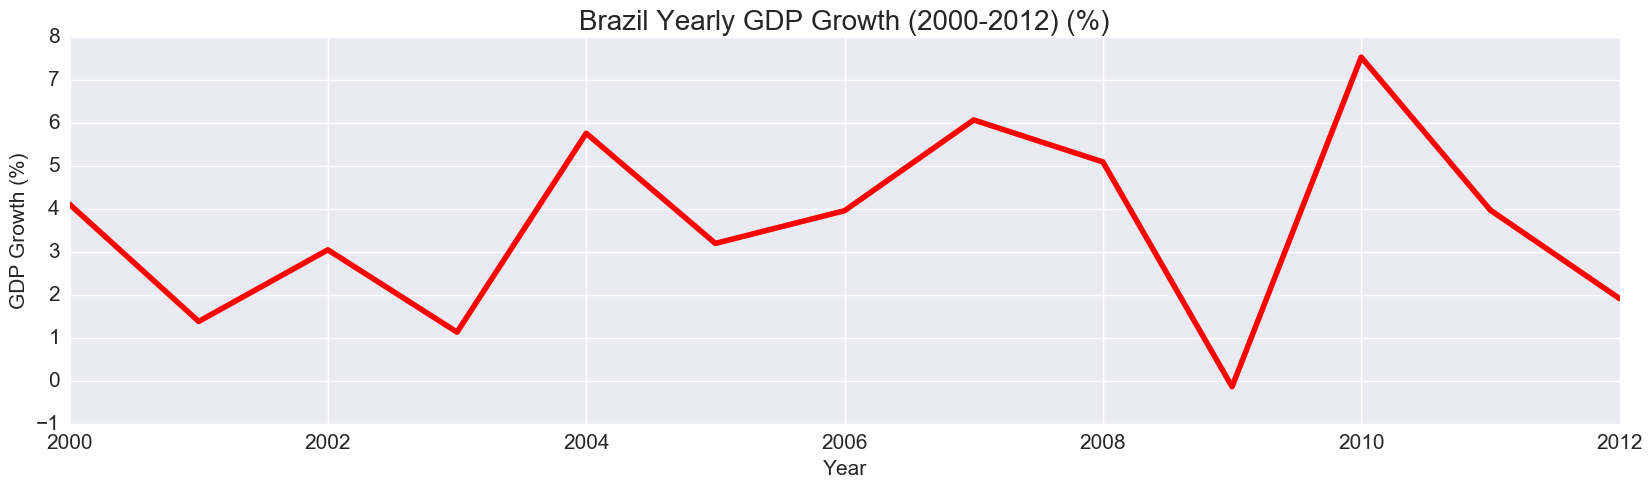

In [555]:
data[5].plot(kind = 'line', 
             title = 'Brazil Yearly GDP Growth (2000-2012) (%)',  
             fontsize=15, 
             color='red', 
             linewidth=4, 
             figsize=(20,5)).title.set_size(20)

plt.xlabel("Year").set_size(15)
plt.ylabel("GDP Growth (%)").set_size(15)

#### GDP Growth vs. GDP Growth Rate
While Brazil's GDP was growing quite consistently over the 12 years, its GDP growth-rate was not steady with negative growth during the 2008 financial crisis. 

### Hypothesis: Household Consumption vs. Foreign Aid
Our hypothesis is that household consumption is a bigger driver of the Brazilian economy than foreign aid. With their rising incomes, Brazilians are expected to be empowered with larger disposable incomes to spend on goods and services. Foreign aid, on the other hand, might not filter down to the masses for spending.

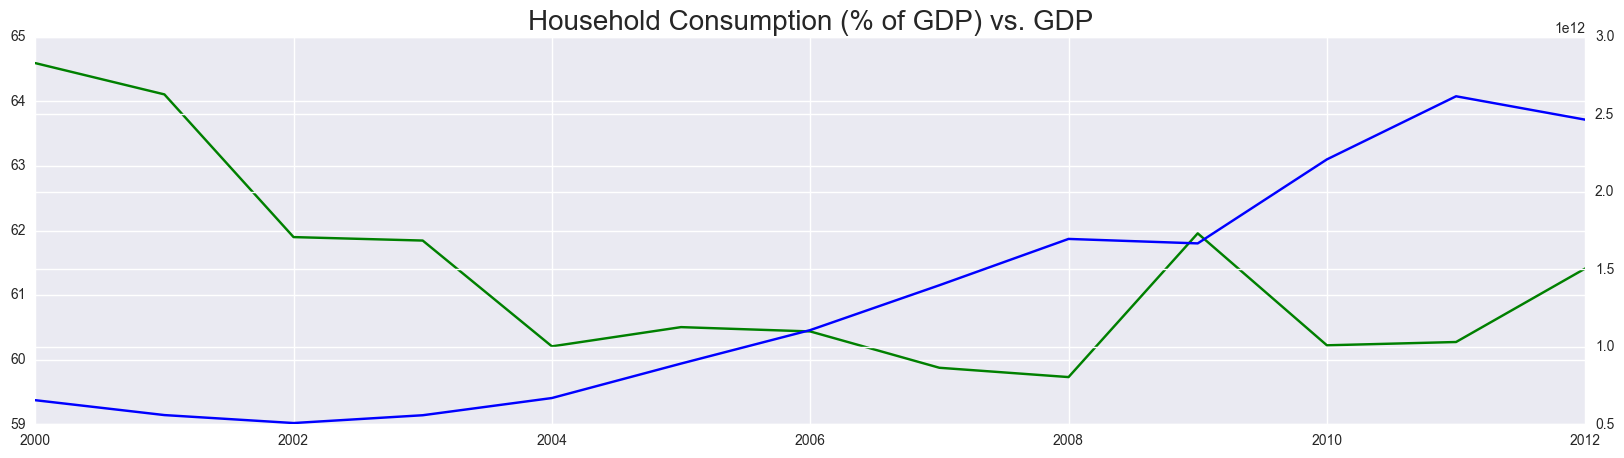

In [559]:
fig, ax1 = plt.subplots(figsize = (20,5))

y1 = data[8]
y2 = data[4]

ax2 = ax1.twinx()

ax1.plot(y1, 'green') #household consumption
ax2.plot(y2, 'blue') #GDP growth

plt.title("Household Consumption (% of GDP) vs. GDP").set_size(20)
        

#### Actual: Household Consumption
GDP comprises of household consumption, net investments, government spending and net exports;increases or decreases in any of these areas would affect the overall GDP respectively. The data shows that despite household consumption decreasing as a % of GDP, the GDP was growing. We found this a little strange and difficult to understand. One explanation for this phenomenon could be that as emerging market economies continue to expand, there is an increased shift towards investments and government spending. 

The blue line represents GDP growth and the green line represents Household Consumption. 

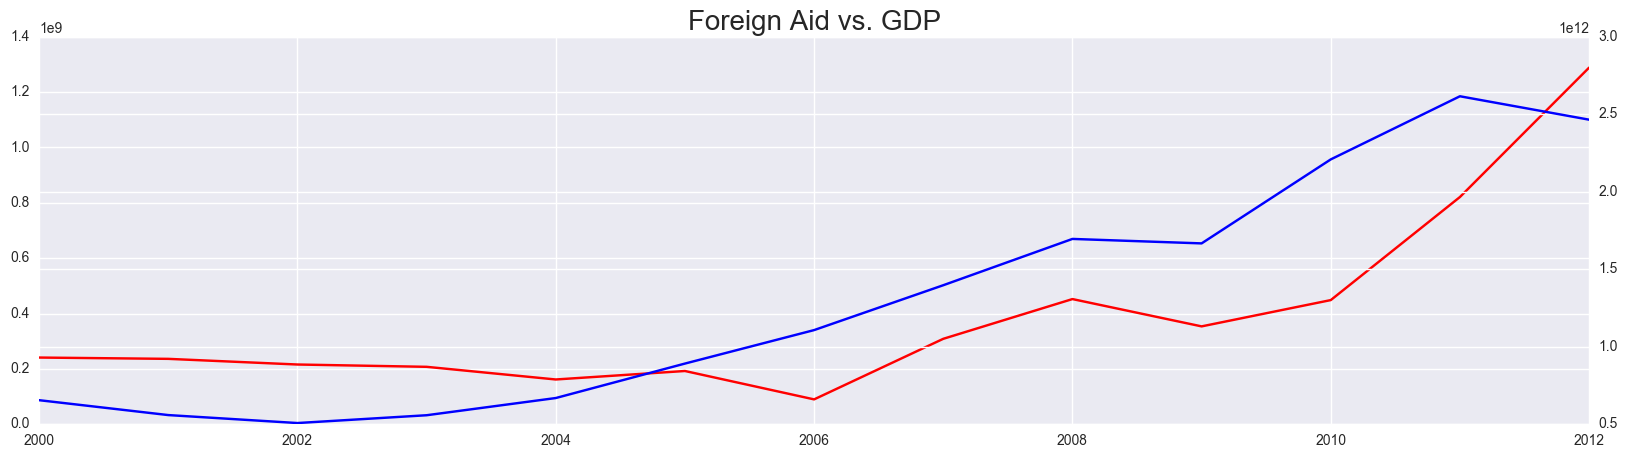

In [560]:
fig, ax1 = plt.subplots(figsize = (20, 5))

y1 = data[11]
y2 = data[4]

ax2 = ax1.twinx()

ax1.plot(y1, 'red') #Net official development assistance 
ax2.plot(y2, 'blue') #GDP growth

plt.title("Foreign Aid vs. GDP").set_size(20)

#### Actual: Foreign Aid
Regarding foreign aid, it should be the case that with decreases in aid there will be reduced economic growth because many developing countries do rely on that as a crucial resource. The data shows a positive corellation for Brazil. While household spending was not a major driver of the Brazil's GDP growth, foreign aid played a big role. We will now explore how foreign direct investment and government spending can affect economic growth.  

The blue line represents GDP growth and the red line represents Foreign Aid. 


### Hypothesis: Foreign Direct Investment vs. Government Spending
For emerging market economies, the general trend is that Governments contribute a significant proportion to the GDP. Given that Brazil experienced growth between the years 2000-2012, it is expected that a consequence was increased foreign direct investment. Naturally, we’d like to compare the increases in Government Spending versus this foreign direct investment and see who generally contributed more to the GDP growth of the country. 
Our hypothesis is that the increased foreign direct investment was a bigger contributor to the GDP growth than government spending. With increased globalisation, we expect many multinationals and investors started business operations in Brazil due to its large, fast-growing market.

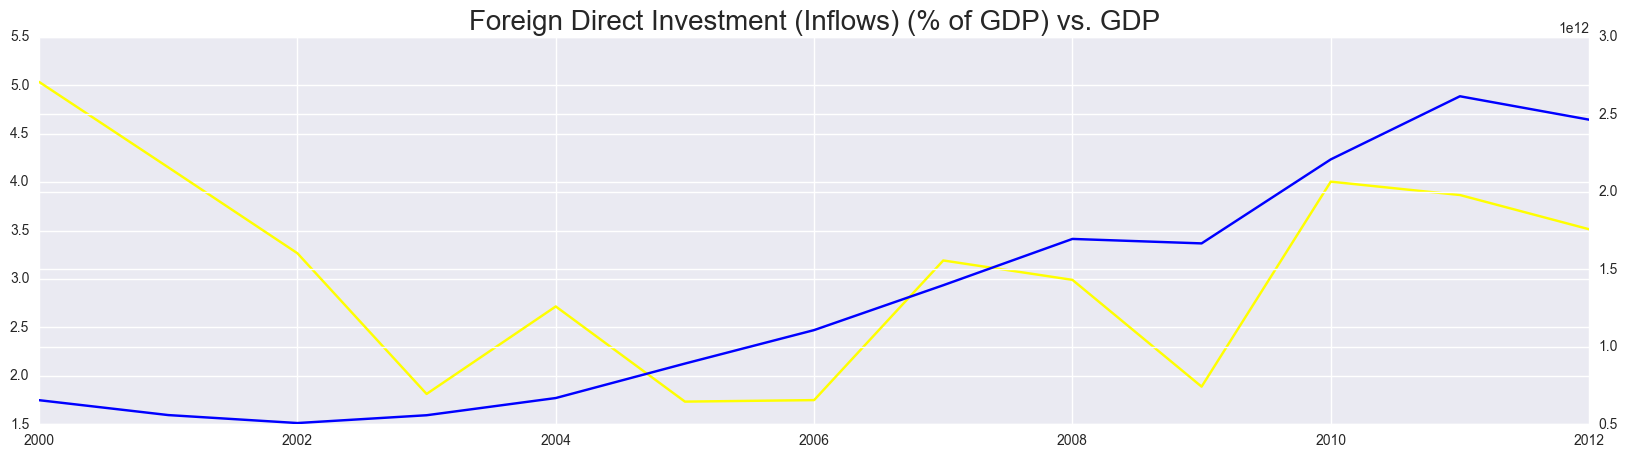

In [561]:
fig, ax1 = plt.subplots(figsize = (20, 5))

y1 = data[2]
y2 = data[4]

ax2 = ax1.twinx()

ax1.plot(y1, 'yellow') #household consumption
ax2.plot(y2, 'blue') #GDP growth

plt.title("Foreign Direct Investment (Inflows) (% of GDP) vs. GDP").set_size(20)

#### Actual: Foreign Direct Investment
Contrary to popular belief and economic concepts, increased foreign direct investment did not act as a major contributor to the GDP growth Brazil experienced. There is no clear general trend or correlation between FDI and GDP growth. 

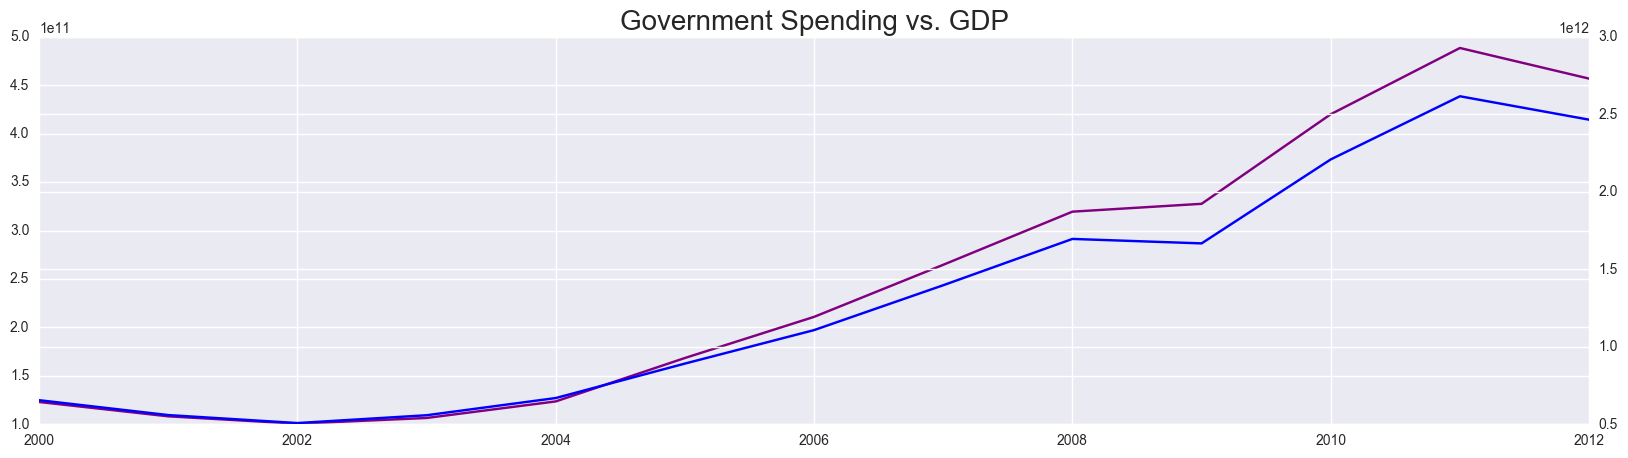

In [562]:
fig, ax1 = plt.subplots(figsize = (20, 5))

y1 = data[14]
y2 = data[4]

ax2 = ax1.twinx()

ax1.plot(y1, 'purple') #household consumption
ax2.plot(y2, 'blue') #GDP growth

plt.title("Government Spending vs. GDP").set_size(20)

#### Actual: Government Spending
It is clear that government spending is positively corellated with the total GDP growth Brazil experienced. We believe that this was the major driver for Brazil's growth.


### Hypothesis: Population Growth and GDP per capita
Brazil’s population growth continued to increase during this time period of 2000-2012. As mentioned earlier, Brazil’s GDP growth was also growing during the same time period. Given that GDP per capita is a nice economic indicator to highlight standard of living in a country, we wanted to see if the increasing population was negating the effects of increased economic growth.
Our hypothesis is that even though population was growing, the GDP per capita over the years generally increased at a higher rate and, all things equal, we are assured increased living standards in Brazil. This finding would prove to us that the GDP was growing at a faster rate than the population.

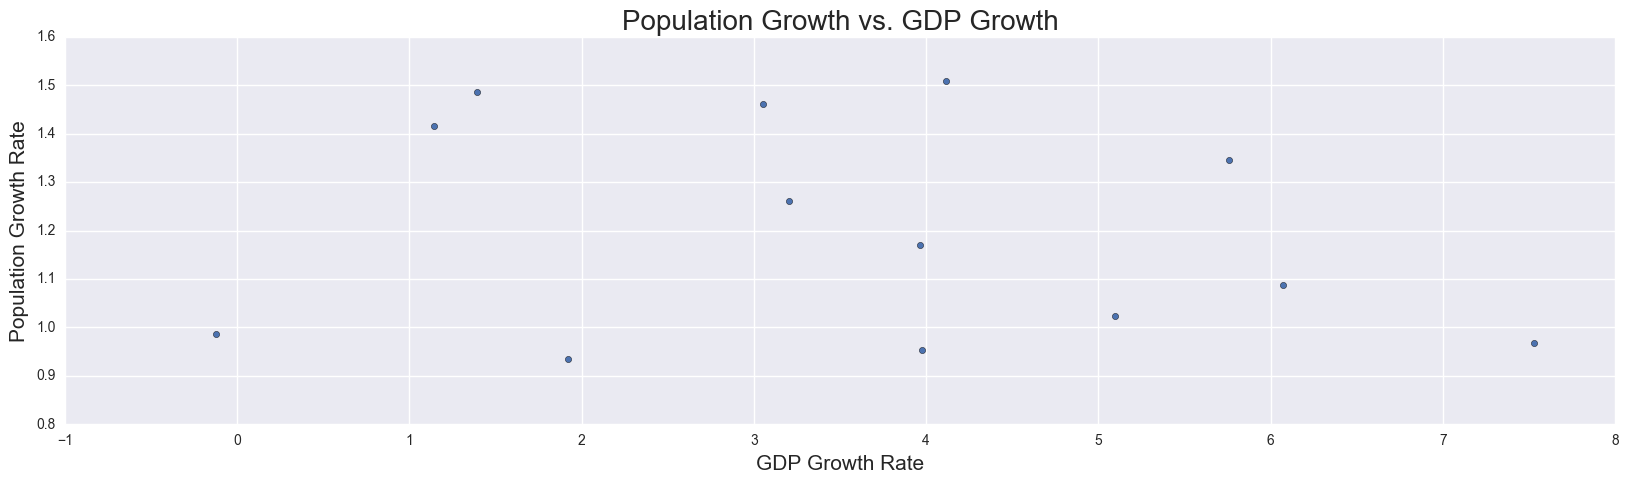

In [563]:
data.plot.scatter(x = 5, y = 0,
                  title = 'Population Growth vs. GDP Growth',
                  figsize=(20,5)).title.set_size(20)

plt.xlabel("GDP Growth Rate").set_size(15)
plt.ylabel("Population Growth Rate").set_size(15)

#### Actual: Population Growth 
There is no correlation between the population growth rate and the overall GDP growth rate. The general GDP rate already accounts for population increases and decreases. 

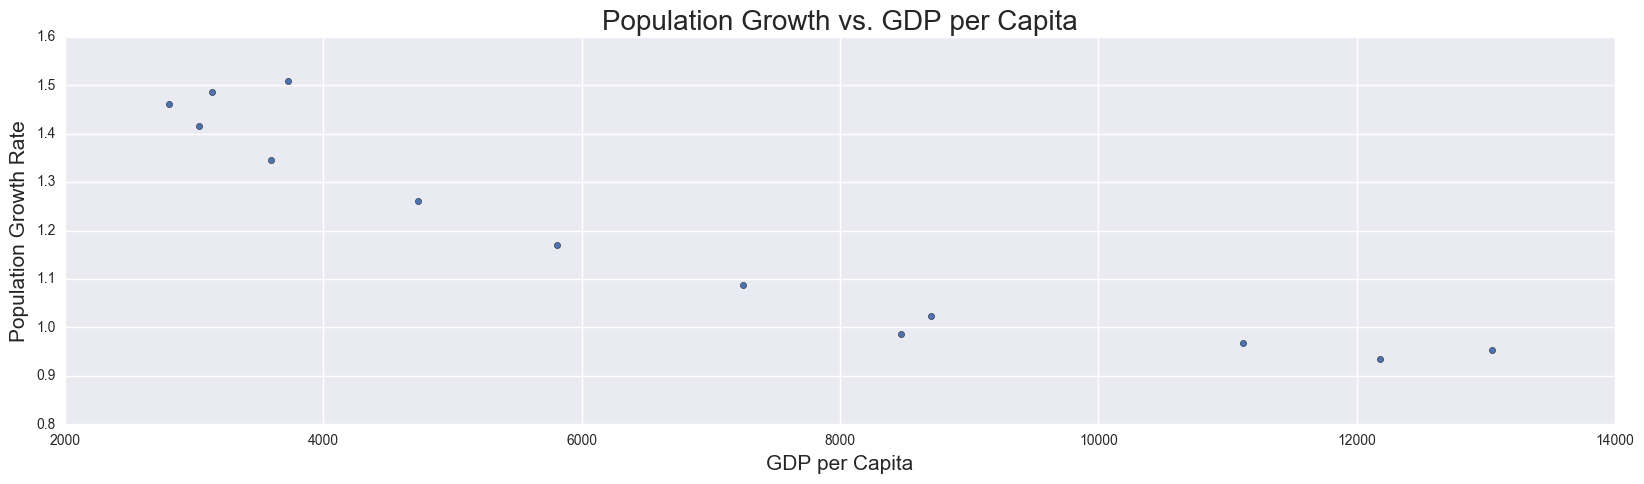

In [564]:
data.plot.scatter(x = 6, y = 0,
                  title = 'Population Growth vs. GDP per Capita',
                  figsize=(20,5)).title.set_size(20)

plt.xlabel("GDP per Capita").set_size(15)
plt.ylabel("Population Growth Rate").set_size(15)

#### Population Growth 
The population growth rate has a negative correlation with GDP per capita. Our explanation is that, as economies advance, the birth rate is expected to decrease. This generally causes population growth rate to fall and GDP per Capita to rise. 

### Hypothesis: Renewable Energy Expenditures and C02 Emissions
What one would expect is that as a country’s economy grows, its investments in renewable energy methods would increase as well. Such actions should lead to a decrease in CO2 emissions as cleaner energy processes are being applied. Our hypothesis disagrees with this.
We believe that despite there being significant increases in renewable energy expenditures due to increased incomes and a larger, more diversified economy, there will still be more than proportionate increases in C02 emissions. By testing this hypothesis we will begin to understand certain explanations as to why this may be true or false.


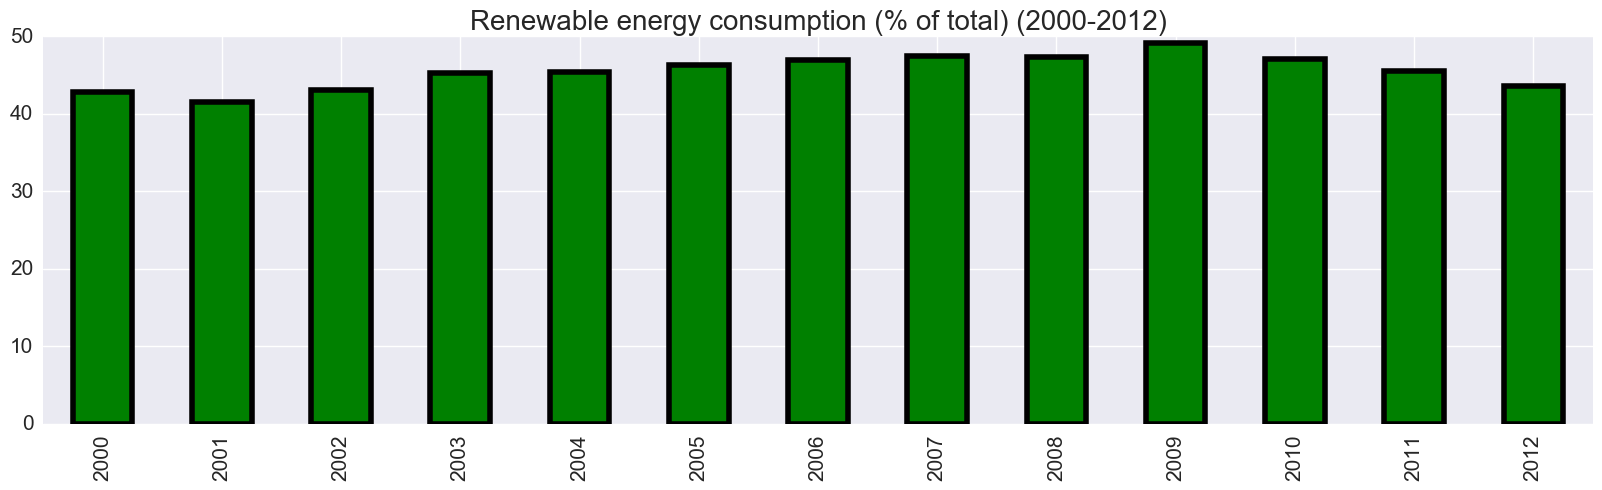

In [565]:
data[15].plot(kind = 'bar', 
            title = 'Renewable energy consumption (% of total) (2000-2012)', 
             fontsize=15,
             color='green', 
             linewidth=4, 
             figsize=(20,5)).title.set_size(20)

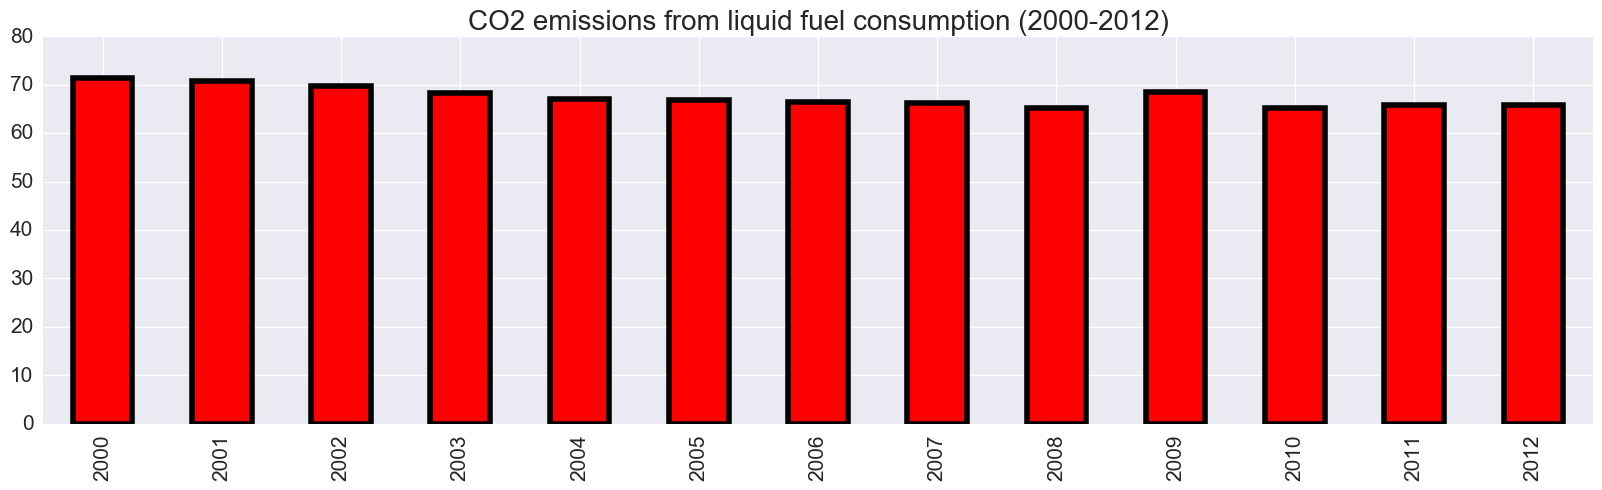

In [566]:
data[12].plot(kind = 'bar', 
            title = 'CO2 emissions from liquid fuel consumption (2000-2012)', 
             fontsize=15,
             color='red', 
             linewidth=4, 
             figsize=(20,5)).title.set_size(20)

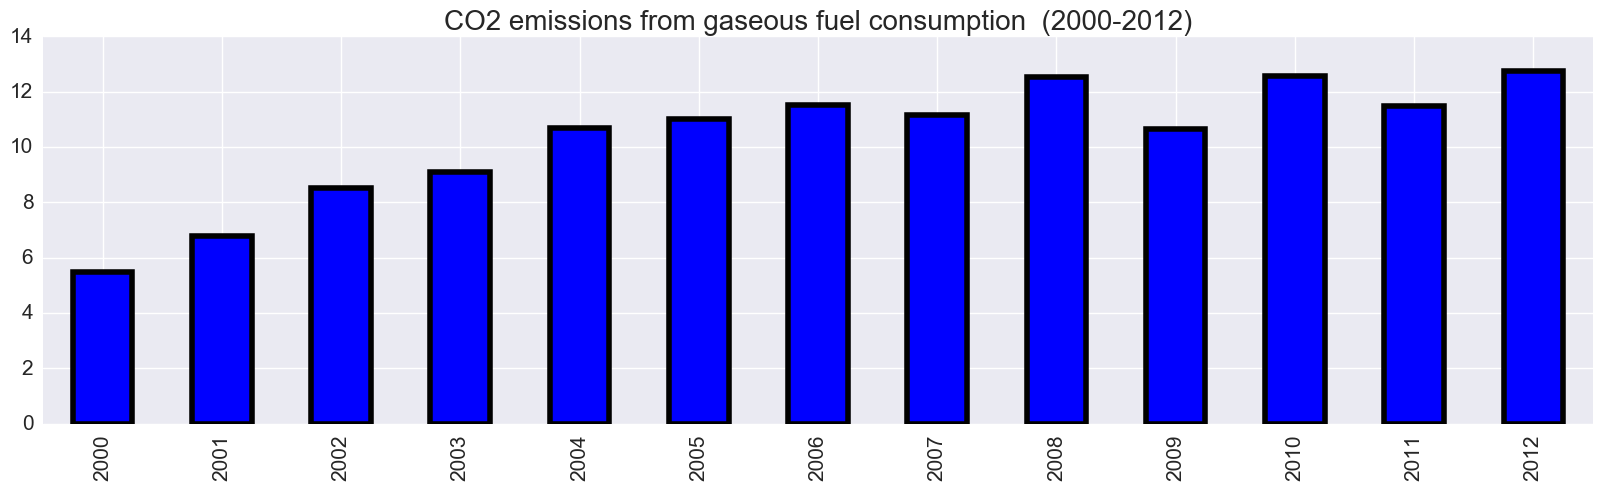

In [567]:
data[13].plot(kind = 'bar', 
            title = 'CO2 emissions from gaseous fuel consumption  (2000-2012)', 
             fontsize=15, 
             color='blue', 
             linewidth=4, 
             figsize=(20,5)).title.set_size(20)

#### Actual: Renewable Energy Consumption vs. CO2 Emmissions
As countries continue to grow their economies, it is expected that people’s incomes will continue to rise. Increased disposable incomes should cause better energy consumption methods but as our hypothesis states, C02 emissions still continue to rise. This could be due to the increase in population as more people are using carbon goods and products.

### Hypothesis: Health Expenditures and Life Expectancy
There should be a positive correlation between health expenditures and life expenditures. Naturally, the more a country is spending on healthcare, the higher the life expectancy ought to be. Our hypothesis agrees with this positive statement and we’d like to test it. If it turns out that health expenditure increases positively affects life expectancy, then we can attribute the increase to an improved economy that allows for more health expenditures from individuals, organisations and institutions.


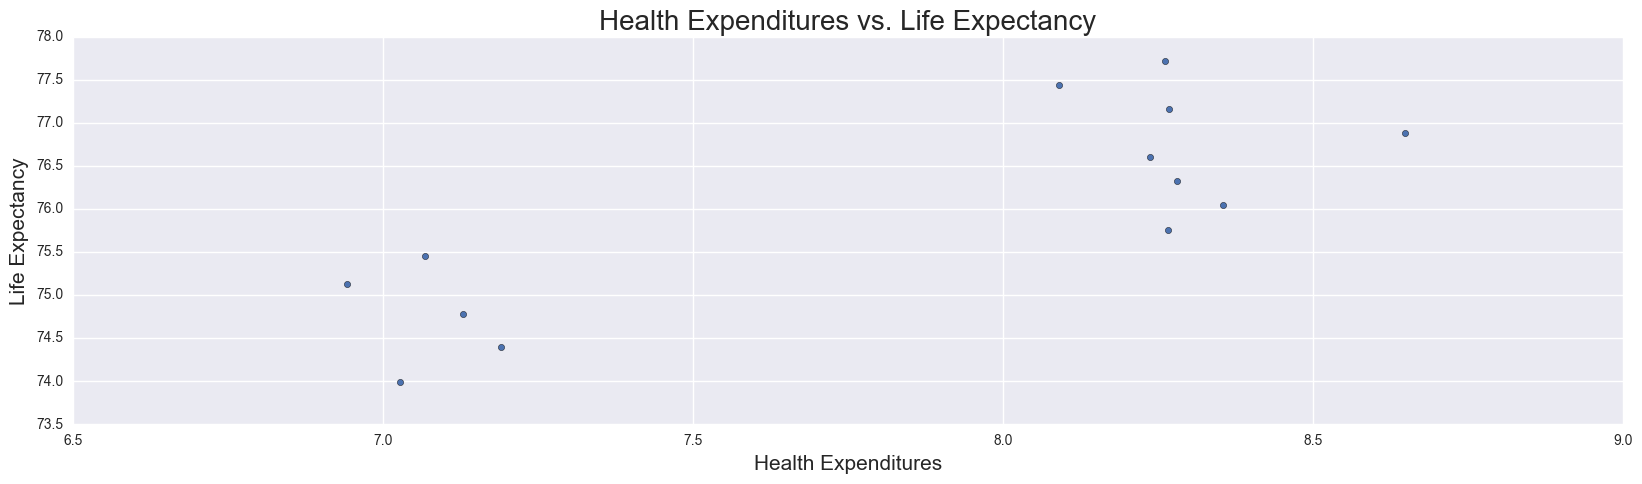

In [568]:
data.plot.scatter(x = 7, y = 19, #scatter plot
                  title = 'Health Expenditures vs. Life Expectancy',
                  figsize=(20,5)).title.set_size(20)

plt.xlabel("Health Expenditures").set_size(15)
plt.ylabel("Life Expectancy").set_size(15)

#### Actual: Health Expenditures and Life Expectancy
As expected, there is a positive correlation between health expenditures and life expectancy in Brazil. This is the natural expectation that as a country spends more on healthcare services, products and research, the life expectancy should increase as improvements to health science will be made due to such investments. 


### Conclusion

When we first started working on this project, we wanted to analyze some of the generally accepted economic concepts we’ve learned in our four years at Stern. Using a previously booming emerging market economy like Brazil as a test subject, we put these economic metrics to test. Some metrics contributed to increased economic growth and some indicators also show that the economic growth played a big role in society. 
	
We started with specific hypotheses of what we expected to happen before running the data. While there were some findings that met our expectations, we came across some surprising information that made us realize that economies aren’t completely systematic and will vary in functioning.

Although household spending and foreign direct investment were generally increasing, we did not find that there was a direct correlation between its growth and the GDP growth rate. What instead was our conclusion was that the foreign aid and government spending were two of the major drivers of GDP growth during the years 2000 - 2012.

![Brazillian People](http://cdn3.tech.co/wp-content/uploads/2014/06/Brazil-People.jpg)